## Realni Genetski Algoritam ##




*   Realni genetski algoritam
*   Ruletska selekcija
*   Simetrično ukrštanje
*   Primeri: sferna i Levijeva funkcija

**Postupak genetskog algoritma:** </br>
START
<br>
Inicijalizacija početne populacije
<br>
Računanje funkcije prilagođenosti
<br>
Ponavljati: <br>

*   Selekciju
*   Ukrštanje
*   Mutaciju
*   Računanje funkcije prilagođenosti

DOK populacija ne iskonvergira <br>
STOP<br>


# 1. Biblioteke

Prvo je nophodno učitati python biblioteke

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import math

from mpl_toolkits import mplot3d

pi = 3.1415

# 2. Generisanje populacije

**Početna populacija** 

GA započinjemo kreiranjem skupa jedinki koji se naziva populacijom. Svaka jedinka predstavlja potencijalno rešenje.

In [2]:
def generate_inital_chromosomes(length, max, min, pop_size):
  return [ [random.uniform(min,max) for j in range(length)] for i in range(pop_size)]

def population_stats(costs):
  return costs[0], sum(costs)/len(costs)

# 3. Funkcije za rangiranje i **selekciju** jedinki

Jedinke se rangiraju (sortiraju) po vrednosti funkcije prilagođenosti funkcijom **rank_chromosomes**.</br>
Implementirane su sledece vrste selekcija: prirodna i ruletska selekcija. </br>
Prirodna selekcija je implementirana u  funkciji **natural_selection**, pri čemu ostavljamo samo prvih *n_keep* jedinki.</br>
Funkcija **roulette_selection** predstavlja ruletski tip selekcije.

In [3]:
def rank_chromosomes(cost, chromosomes):
  costs = list(map(cost, chromosomes))
  ranked  = sorted( list(zip(chromosomes,costs)), key = lambda c:c[1])
  
  return list(zip(*ranked))

def natural_selection(chromosomes, n_keep):
  return chromosomes[:n_keep]

def roulette_selection(parents):

  pairs = []
  i = 0
  for i in range(0, len(parents), 2):

    weights=[];
    for i in range(len(parents)):
        weights.append((len(parents)-i)*random.random()) #za minimum
      #  weights.append((i+1)*random.random()) #za maksimum
    if (weights[0]>=weights[1]):
        maxInd1=0;
        maxInd2=1;
    else:
        maxInd1=1;
        maxInd2=0;
    
    for i in range(2,len(parents)):
        if weights[i]>weights[maxInd1]:
            maxInd2=maxInd1
            maxInd1=i
        elif weights[i]>weights[maxInd2]:
            maxInd2=1
    pairs.append([parents[maxInd1], parents[maxInd2]])
      
  return pairs

# 4. Ukrštanje
a, b - roditelji </br>
y1, y2 - potomci </br>
(a, b) -> (y1, y2) </br>
**Simetrično ukrštanje** </br>
y1 = r * a + (1 - r) * b</br>
y2 = (1 - r) * a + r * b,</br>
gde je r slučajno odabrani broj u intervalu (0, 1).

In [4]:
def crossover(pairs):

  children = []
  
  for a,b in pairs:

    r=random.random()
    y1=[]
    y2=[]
    for i in range(0,len(a)):
      y1.append(r * a[i] + (1 - r) * b[i])
      y2.append((1 - r) *  a[i] + r*b[i])
    children.append(y1)
    children.append(y2)
      
  
  return children 

In [ ]:
crossover([[[-0.5, -0.5], [-7.04, -2.5]],[[-1.5, -1.05], [-9.04, -9.5]]])

[[-0.9988622980041868, -0.6525572776771214],
 [-6.5411377019958135, -2.347442722322879],
 [-7.940406322192531, -8.267696740388182],
 [-2.599593677807469, -2.2823032596118185]]

# 5. Mutacija

Mutacija predstavlja slučajnu promenu nekih gena određene jedinke. Kako deluje nad samo jednom jedinkom, mutacija je unarni operator koji kao rezultat daje izmenjenu jedinku. Mutacija se na svaku jedinku primenjuje sa nekom malom verovatnoćom. Ukoliko je verovatnoća mutacije premala, ili se uopšte ne primenjuje, može doći do preuranjene lokalne konvergencije. Ako je vrednost verovatnoće mutacije velika, genetski algoritam će se svesti na slučajnu pretragu što nema smisla.

In [5]:
def mutation(chromosomes, mutation_rate,mutation_width):
  mutated_chromosomes = [] 
  for chromosome in chromosomes: 
    y1=[]
    for i in range(0,len(chromosome)):
      if random.random() < mutation_rate:
        r=random.random()  
            
        y1.append( chromosome[i] + mutation_width * 2 * (r - 0.5) )        
      else:
        y1.append(chromosome[i])
      
    mutated_chromosomes.append(y1)
  return mutated_chromosomes  

In [ ]:
mutation([[-0.23170627655571208, 2.8058402091757224], [-2.538231077587461, 0.14136977843141585]], 0.3,1)

[[-0.23170627655571208, 3.8035626232761612],
 [-2.538231077587461, 0.14136977843141585]]

# 6. Elitizam

Postoji mogućnost da se dobro rešenje dobijeno nakon mnogo iteracija izgubi zbog genetskih operatora mutacije ili selekcije. Zbog toga se javlja potreba da se najbolje jedinke zaštite od izmene ili eliminacije tokom evolutivnog procesa. Takav mehanizam se naziva **elitizam**. 

In [6]:
def elitis(chromosomes_old,chromosomes_new, elitis_rate, population_size):
 
  old_ind_size=int(np.round(population_size*elitis_rate))
  return chromosomes_old[:old_ind_size]+chromosomes_new[:(population_size-old_ind_size)]

# 7. Definicija  funkcije

Definisaćemo funkciju kojoj tražimo optimum (minimum). 

##  Primer 1: Sfera funkcija 

Kao prvi primer koristićemo sfernu funkciju koja se definiše na sledeći način


\begin{equation}
f(x, y) = x^2 +y ^2 \\
\mbox{interval: }  -10 < x, y < 10,\\
\mbox{minimum: } f(0,0) = 0 
\end{equation}

##  Primer 2: Levijeva funkcija 
Kao drugi primer koristićemo Levijevu funkciju koja se definiše na sledeći način


\begin{equation}
f(x, y) = sin^2 3πx + (x − 1)^2(1 + sin^2 3πy) + (y − 1)^2(1 + sin^2 2πy) \\
 \mbox{interval: } -10 < x, y < 10,\\
  \mbox{minimum: } f(1,1) = 0 
\end{equation}

In [7]:
def sphera_function(chromosome):
  x = chromosome[0]
  y = chromosome[1] 
  
  tmp1 = math.pow(x, 2)
  tmp2 = math.pow(y, 2)


  return tmp1 + tmp2 

In [8]:
def levy_function(chromosome):
  x = chromosome[0]
  y = chromosome[1] 
  
  tmp1 = math.pow(math.sin(3*pi*x), 2)
  tmp2 = math.pow((x - 1), 2) * (1 + math.pow(math.sin(3*pi*y), 2))
  tmp3 = math.pow((y - 1), 2) * (1 + math.pow(math.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3

# 7.1. 3D Prikaz funkcije

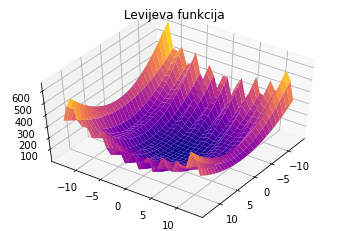

In [ ]:
def l_show(x, y):
  tmp1 = math.pow(math.sin(3*pi*x), 2)
  tmp2 = math.pow((x - 1), 2) * (1 + math.pow(math.sin(3*pi*y), 2))
  tmp3 = math.pow((y - 1), 2) * (1 + math.pow(math.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3

levy_vectorized = np.vectorize(l_show)

x = np.linspace(-13, 13, 30)
y = np.linspace(-13, 13, 30)

X, Y = np.meshgrid(x, y)
Z = levy_vectorized(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('Levijeva funkcija');

ax.view_init(50, 35)

# 8. Main loop - sklopljen genetski algoritam
- Generišemo početnu populaciju veličine *population_size* 
- Vrtimo glavnu petlju maksimalno *max_iter* puta, pri čemu svaka iteracija petlje predstavlja jednu generaciju
- Rangiramo jedinke po prilagođenosti, funkcijom **rank_chromosomes**

- Funkcijom **roulette_selection** odvajamo parove roditeljskih hromozoma koje ćemo ukrstiti
- Metodom *ukrštanja*, tj funkcijom **crossover** uparujemo roditeljske hromozome i dobijemo populaciju dece
- Spajamo novonastale hromozome sa roditeljskim u novu populaciju *chromosomes* 
- Na ovoj populaciji vršimo * mutaciju* funkcijom **mutation** sa zadatim *mutation_rate = 0.3*

- Proveravamo da li populacija konvergira ili da li smo došli do optimalnog rešenja
- Ispisujemo statistike za svaku generaciju: prosečna prilagođenost, najbolji hromozom i sastav najboljeg hromozoma

In [9]:
def genetic(cost_func , extent, population_size, mutation_rate = 0.8,elitis_rate=0.1, chromosome_length = 2, precision = 13, max_iter = 100):

  min_val = extent[0]
  max_val = extent[1]

  
  avg_list = []
  best_list = []
  curr_best = 10000
  same_best_count = 0



  
  chromosomes = generate_inital_chromosomes(chromosome_length, max_val, min_val, population_size)

  for iter in range(max_iter):
      
    ranked_parents, costs = rank_chromosomes(cost_func, chromosomes)     
    best, average = population_stats(costs)
    parents = natural_selection(ranked_parents, population_size)  

    pairs = roulette_selection (parents)  
        
    children = crossover(pairs)   
    print(children)   
    chromosomes = mutation(children, mutation_rate,1)

    ranked_children, costs = rank_chromosomes(cost_func, chromosomes)
    chromosomes=elitis(ranked_parents,ranked_children, elitis_rate, population_size)
    print("Generation: ",iter+1," Average: {:.3f}".format(average)," Curr best: {:.3f}".format(best), 
         "[X, Y] = {:.3f} {:.3f}".format(chromosomes[0][0],chromosomes[0][1]))
    print("-------------------------")
    
    avg_list.append(average)
    if best < curr_best:
      best_list.append(best)
      curr_best = best
      same_best_count = 0
    else:
      same_best_count += 1
      best_list.append(best)
      
    ##
    if (cost_func(chromosomes[0]) < 0.005):
      
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
     
      print("\nSolution found ! Chromosome content: [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      return
        
    if same_best_count > 20:
      print("\nStopped due to convergance.Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
      
      return
    
    if iter == 499:
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
      
      print("\nStopped due to max number of iterations, solution not found. Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))

In [10]:
all_avg_list = []
generations_list = []
all_best_list = []
genetic(sphera_function, [-10, 10], 50)

[[3.263683970325858, 2.4619988233517787], [2.9952340565360926, 0.5286510819011856], [-0.9600797159314055, -0.9789786659663944], [0.19282635586926178, 0.694233766344224], [0.2176981305310779, -0.3545110701194518], [-0.05774807481122135, -0.02822539427367521], [2.495757284048321, -0.6818861167203187], [-1.3120919235490538, -1.690180187717131], [-1.6464658170561792, 3.722381135777887], [-1.2483087817223584, 4.047826443141451], [0.7105369026260345, 1.4455870156326265], [-1.4777902626881785, -1.730331915254797], [2.423309751931923, -0.3790245997207057], [0.9549602475156805, 1.1919877228408136], [0.7547455570713621, -0.5164553025655442], [1.667654226886165, -1.8463699306317591], [0.6976510620953993, 1.8401557017416654], [0.6409980307174588, 3.219002896809996], [0.43749813949768446, 1.1842879286024364], [0.2017404307791144, 0.9573425439458301], [0.7136756394430961, 1.4501422639676935], [0.7136756394430961, 1.4501422639676935], [-0.01948003450865335, 0.7443910190030049], [0.6587186047854522, 1

# 9. Iscrtavanje grafikona</br>

Iscrtavamo prosečnu i najbolji prilagođenost za svaku generaciju.

In [11]:
def display_stats(all_avg_list, all_best_list, generations_list):
  
  c = 0
  colors = ['red', 'green', 'blue', 'yellow', 'orange']
  
  for average_list in all_avg_list:
      x_axis = list(range(generations_list[c]))
      y_axis = average_list
      plt.plot(x_axis, y_axis, linewidth=3, color=colors[c], label=str(c + 1))
      plt.title('Average cost function value', fontsize=19)
      plt.xlabel('Generation', fontsize=10)
      plt.ylabel('Cost function')
      c += 1
  plt.legend(loc='upper right')
  plt.show()

  c = 0

  for best_list in all_best_list:
      x_axis = list(range(generations_list[c]))
      y_axis = best_list
      plt.plot(x_axis, y_axis, color=colors[c], label=str(c + 1))
      plt.title('Best cost function value', fontsize=19)
      plt.xlabel('Generation')
      plt.ylabel('Cost function')
      c += 1
  plt.legend(loc='upper right')
  plt.show()

# 10. Konfigurisanje i poziv genetskog algoritma

Argumenti funkcije:


1.   Funkcija za minimizaciju (u našem slučaju Levy_function) - *function*
2.   Opseg u kome pretražujemo rešenje - *list*
3.   Broj hromozoma (jedinki) - *int*


---

Opcioni argumenti:


4.   Stopa mutacije - *float*
5.   Stopa elitizma - *float*
7.   Maksimalni broj iteracija - *int*



 1 : run of genetic algorithm with  20  chromosomes.

[[1.1504023572755104, 4.411966066590366], [-0.905815147055318, 1.8243389428193875], [1.2006271610098764, 4.475170987351613], [1.2006271610098764, 4.475170987351613], [1.0113031001857036, 4.236917945570156], [-0.7667158899655111, 1.9993870638395974], [0.42455740309890033, 3.4985334714861134], [-0.1799701928787079, 2.7377715379236407], [0.04609868911565651, 3.0222657461759788], [0.19848852110453596, 3.214039263233775], [1.2486322316225378, 2.1597296073558914], [1.315028119014369, -1.0427609455490454], [1.2006271610098764, 4.475170987351613], [1.2006271610098764, 4.475170987351613], [1.2006271610098764, 4.475170987351613], [1.2006271610098764, 4.475170987351613], [3.2463430776314404, 4.032957854561005], [2.768487607120008, 4.136253704644123], [-1.2654458813690486, 2.2807231496063163], [-0.8624123441800186, 2.639364624949692]]
Generation:  1  Average: 91.273  Curr best: 7.454 [X, Y] = -0.956 1.761
-------------------------
[[1.55466374

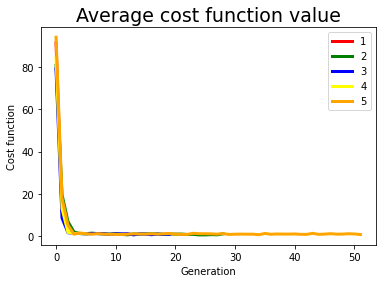

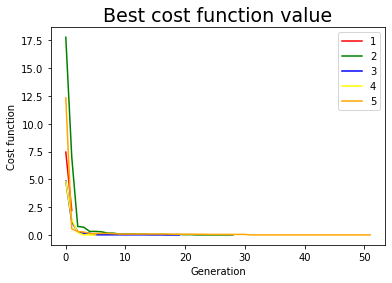


 1 : run of genetic algorithm with  100  chromosomes.

[[-4.003501286679899, 0.8827506721688136], [-1.4563219147811373, 1.948814527030195], [3.289485305619382, 2.305600220005128], [1.5117830886012285, 2.249135012194631], [1.6881119736816395, 0.26080208417975403], [2.62916757191016, 1.0723946111296463], [0.2756898302082078, -0.9717686040420723], [0.2756898302082078, -0.9717686040420723], [-0.30117054583249325, -0.6077126391722212], [-0.47718596624680343, -0.4966294960540969], [-0.013545484865851054, -0.8215599184823644], [2.390568698131935, 0.9537461063585493], [2.58302393317566, 1.0299806046849378], [0.7859592227228971, -0.5290796361157399], [0.2756898302082078, -0.9717686040420723], [0.2756898302082078, -0.9717686040420723], [-0.7894534636699364, 0.0900502233665641], [4.095904975058197, 1.8095984648723729], [-0.7619693458561803, 1.156628232745026], [-0.3180258804202949, 0.24603264476999187], [-1.4842007319956756, -0.6864208672741026], [-1.081379787583995, -0.16776683904259276], [0.35

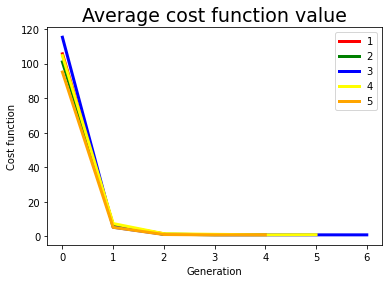

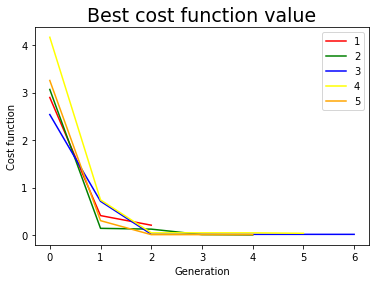


 1 : run of genetic algorithm with  150  chromosomes.

[[-1.3185094535824373, 1.3591779507623716], [-0.7789236348714316, 2.121369539531624], [0.24420141677226015, 0.9849931517483284], [1.6847754238707595, 0.682791544985133], [0.9827460541428317, 0.8300622873984571], [0.946230786500188, 0.8377224093350042], [-0.14792723601465105, -0.21578931259868056], [-1.0114064493800856, 0.8892312585164749], [-0.30664630378905733, -0.23232274002776776], [-0.37048297055892776, -0.13715223393769904], [-1.1359953687408373, 1.0486714820860175], [-0.023338316653899543, -0.3752295361682231], [0.01330791594208991, -0.12337192904569966], [-0.5759015042248152, 1.6397387016141405], [0.03673557584804521, 2.8957902227669687], [-0.42023844246518954, 2.375030838413886], [-0.04070075164958842, -0.35301030084916024], [-1.1186329337451484, 1.0264522467669546], [-0.974751463273887, -1.9156487299881622], [-1.2897015866676604, 0.8203101276207103], [-0.9567075110993185, 1.6646411573191358], [-0.5713176862423067, 3.35965

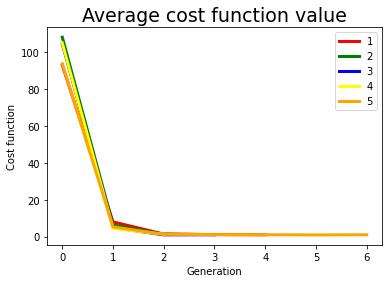

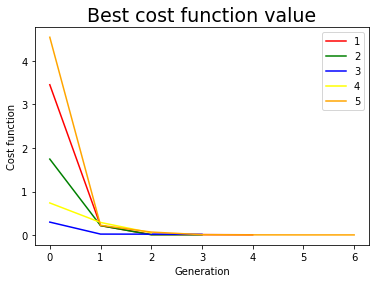

In [12]:
number_of_chromosomes = [20, 100, 150]
all_avg_list = []
generations_list = []
all_best_list = []
run_number = 5

for x in number_of_chromosomes:
  
  print("==========================")
  
  for k in range(0, run_number):
    
    print("\n", k + 1, ": run of genetic algorithm with ", x ," chromosomes.\n")    
    genetic(levy_function, [10, -10], x)
    
  display_stats(all_avg_list, all_best_list, generations_list)
  all_best_list = []
  all_avg_list = []
  generations_list = []